# Regression

In [1]:
# https://github.com/JuliaAcademy/DataScience/blob/master/07.%20Regression.ipynb 

In [2]:
using Plots
using Statistics
using StatsBase
using PyCall
using DataFrames
using GLM
using Tables
using XLSX
using MLBase
using RDatasets
using LsqFit

## Linear Regression

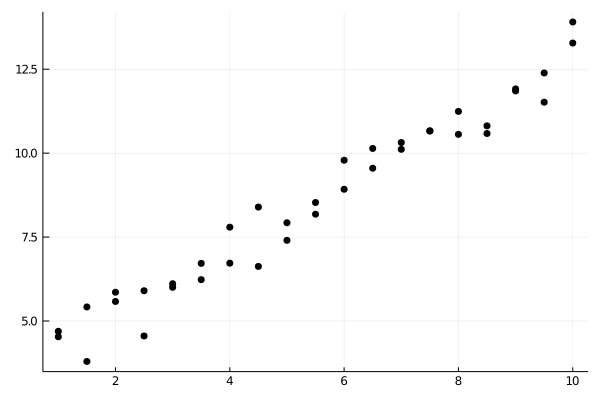

In [3]:
# Generate and plot a set of x,y pairs.
xvals = repeat(1:0.5:10,inner=2)
yvals = 3 .+ xvals .+ 2 .* rand(length(xvals)) .-1
scatter(xvals,yvals,color=:black,leg=false)

In [4]:
# function to find best fit
function find_best_fit(xvals,yvals)
    meanx = mean(xvals)
    meany = mean(yvals)
    stdx = std(xvals)
    stdy = std(yvals)
    r = cor(xvals,yvals)
    a = r*stdy/stdx
    b = meany - a*meanx
    return a,b
end

find_best_fit (generic function with 1 method)

In [5]:
# apply fitting function to pairs
a,b = find_best_fit(xvals,yvals)
ynew = a .* xvals .+ b

38-element Array{Float64,1}:
  4.266549515819558
  4.266549515819558
  4.7433248899415545
  4.7433248899415545
  5.220100264063552
  5.220100264063552
  5.696875638185549
  5.696875638185549
  6.1736510123075465
  6.1736510123075465
  6.650426386429544
  6.650426386429544
  7.127201760551541
  ⋮
 10.464629379405523
 10.464629379405523
 10.941404753527518
 10.941404753527518
 11.418180127649517
 11.418180127649517
 11.894955501771513
 11.894955501771513
 12.371730875893512
 12.371730875893512
 12.848506250015507
 12.848506250015507

In [6]:
np = pyimport("numpy")

PyObject <module 'numpy' from '/Users/a.a.gonzalez.paje/.julia/conda/3/lib/python3.8/site-packages/numpy/__init__.py'>

  0.412808 seconds (1.04 M allocations: 54.221 MiB, 3.95% gc time)


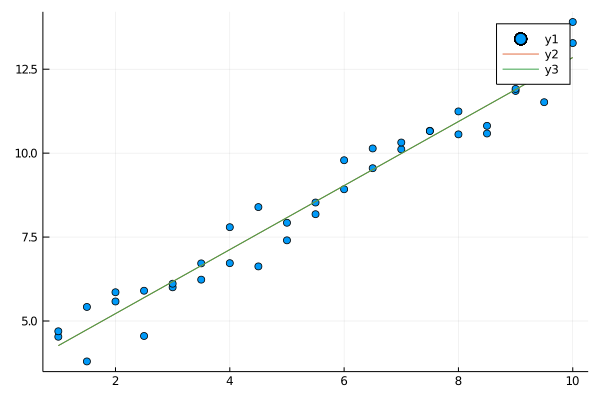

In [7]:
xdata = xvals
ydata = yvals
@time myfit = np.polyfit(xdata,ydata,1);
ynew2 = collect(xdata) .* myfit[1] .+ myfit[2];
scatter(xvals,yvals)
plot!(xvals,ynew)
plot!(xvals,ynew2)

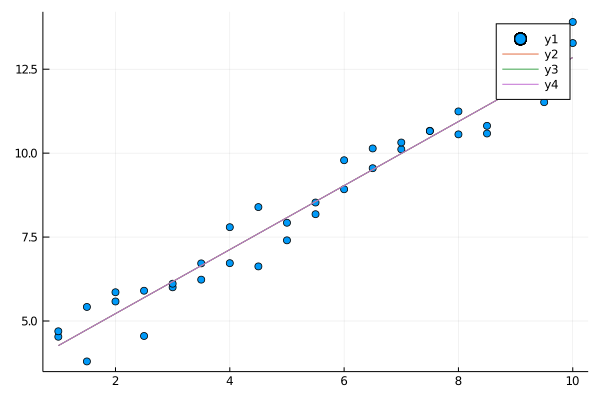

In [8]:
data = DataFrame(X=xdata,Y=ydata)
ols = lm(@formula(Y~X),data)
plot!(xdata,predict(ols))

In [9]:
# get data
R = XLSX.readxlsx("data/zillow_data_download_april2020.xlsx")

XLSXFile("zillow_data_download_april2020.xlsx") containing 4 Worksheets
            sheetname size          range        
-------------------------------------------------
 MonthlyListings_City 8348x91       A1:CM8348    
     Sale_counts_city 28760x148     A1:ER28760   
Sales_median_price_c… 3767x148      A1:ER3767    
                 meta 1x1           A1:A1        


In [10]:
sale_counts = R["Sale_counts_city"][:]
df_sale_counts = DataFrame(sale_counts[2:end,:],Symbol.(sale_counts[1,:]))

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05
,Any,Any,Any,Any,Any,Any,Any
1,6181,New York,New York,1,missing,missing,missing
2,12447,Los Angeles,California,2,1446,1705,1795
3,39051,Houston,Texas,3,2926,3121,3220
4,17426,Chicago,Illinois,4,2910,3022,2937
5,6915,San Antonio,Texas,5,1479,1529,1582
6,13271,Philadelphia,Pennsylvania,6,1609,1795,1709
7,40326,Phoenix,Arizona,7,1310,1519,1654
8,18959,Las Vegas,Nevada,8,1618,1856,1961
9,54296,San Diego,California,9,772,1057,1195


In [14]:
monthly_listings = R["MonthlyListings_City"][:]
df_monthly_listings = DataFrame(monthly_listings[2:end,:],Symbol.(monthly_listings[1,:]))

,SizeRank,RegionID,RegionName,RegionType,StateName,2013-01,2013-02,2013-03
,Any,Any,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,28904,28155,30596
2,2,12447,Los Angeles,City,CA,6431,6613,6467
3,3,39051,Houston,City,TX,11696,11737,12291
4,4,17426,Chicago,City,IL,9523,9609,9772
5,5,6915,San Antonio,City,TX,7223,7170,7438
6,6,13271,Philadelphia,City,PA,7505,7266,7578
7,7,40326,Phoenix,City,AZ,6232,5720,5872
8,8,18959,Las Vegas,City,NV,7027,6218,6199
9,9,54296,San Diego,City,CA,4121,3844,3932


In [15]:
monthly_listings_2020_02 = df_monthly_listings[!,[1,2,3,4,5,end]]
rename!(monthly_listings_2020_02, Symbol("2020-02") .=> Symbol("listings"))

,SizeRank,RegionID,RegionName,RegionType,StateName,listings
,Any,Any,Any,Any,Any,Any
1,1,6181,New York,City,NY,21164
2,2,12447,Los Angeles,City,CA,5553
3,3,39051,Houston,City,TX,11654
4,4,17426,Chicago,City,IL,9417
5,5,6915,San Antonio,City,TX,6887
6,6,13271,Philadelphia,City,PA,5110
7,7,40326,Phoenix,City,AZ,4419
8,8,18959,Las Vegas,City,NV,6749
9,9,54296,San Diego,City,CA,2305


In [16]:
sale_counts_2020_02 = df_sale_counts[!,[1,end]]
rename!(sale_counts_2020_02, Symbol("2020-02") .=> Symbol("sales"))

,RegionID,sales
,Any,Any
1,6181,4054
2,12447,1522
3,39051,2682
4,17426,2100
5,6915,1626
6,13271,1620
7,40326,2325
8,18959,2547
9,54296,missing


In [17]:
Feb2020data = innerjoin(monthly_listings_2020_02,sale_counts_2020_02,on=:RegionID) #, type="outer")
dropmissing!(Feb2020data)
sales = Feb2020data[!,:sales]
# prices = Feb2020data[!,:price]
counts = Feb2020data[!,:listings]
using DataStructures
states = Feb2020data[!,:StateName]
C = counter(states)
C.map
countvals = values(C.map)
topstates = sortperm(collect(countvals),rev=true)[1:10]
states_of_interest = collect(keys(C.map))[topstates]
all_plots = Array{Plots.Plot}(undef,10)

10-element Array{Plots.Plot,1}:
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

(si, coef(ols)) = ("CA", [0.29595375979515304])
(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [0.4800747758857476])
(si, coef(ols)) = ("NY", [0.19151984869233082])


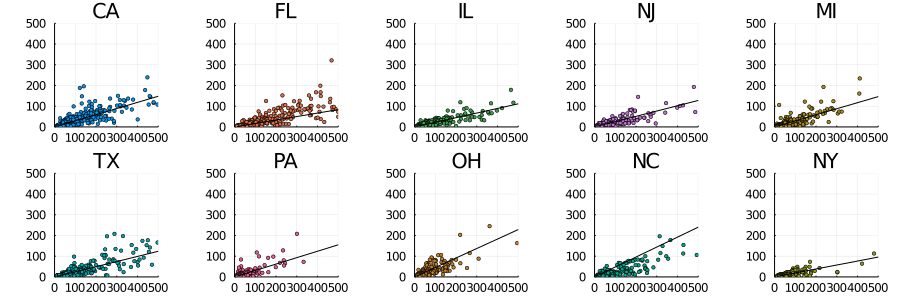

In [18]:
all_plots = Array{Plots.Plot}(undef,10)
for (i,si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!,:StateName].==si)
    data = DataFrame(X=float.(counts[curids]), Y=float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data)    
    all_plots[i] = scatter(counts[curids],sales[curids],markersize=2,
        xlim=(0,500),ylim=(0,500),color=i,aspect_ratio=:equal,
        legend=false,title=si)
    @show si,coef(ols)
    plot!(counts[curids],predict(ols),color=:black)
end
plot(all_plots...,layout=(2,5),size=(900,300))

(si, coef(ols)) = ("CA", [0.29595375979515304])
(si, coef(ols)) = ("FL", [0.16693529057344902])
(si, coef(ols)) = ("IL", [0.22291703276169347])
(si, coef(ols)) = ("NJ", [0.25556391864492345])
(si, coef(ols)) = ("MI", [0.2925436820147375])
(si, coef(ols)) = ("TX", [0.24732835944836878])
(si, coef(ols)) = ("PA", [0.310066636803275])
(si, coef(ols)) = ("OH", [0.4569949754409864])
(si, coef(ols)) = ("NC", [0.4800747758857476])
(si, coef(ols)) = ("NY", [0.19151984869233082])


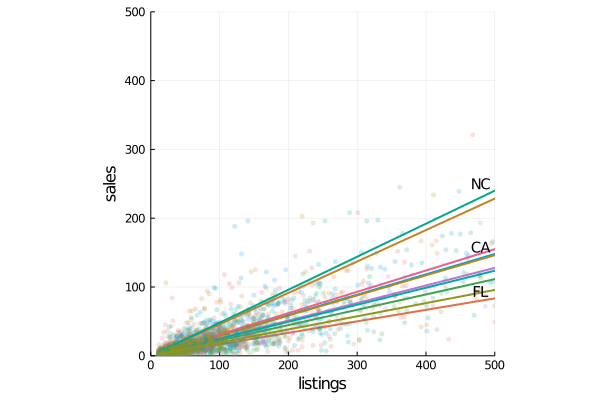

In [20]:
plot()
for (i,si) in enumerate(states_of_interest)
    curids = findall(Feb2020data[!,:StateName].==si)
    data = DataFrame(X=float.(counts[curids]), Y=float.(sales[curids]))
    ols = GLM.lm(@formula(Y ~ 0 + X), data)    
    scatter!(counts[curids],sales[curids],markersize=2,
        xlim=(0,500),ylim=(0,500),color=i,aspect_ratio=:equal,
        legend=false,marker=(3,3,stroke(0)),alpha=0.2)
        if si == "NC" || si == "CA" || si == "FL"
            annotate!([(500-20,10+coef(ols)[1]*500,text(si,10))])
        end
    @show si,coef(ols)
    plot!(counts[curids],predict(ols),color=i,linewidth=2)
end
# plot(all_plots...,layout=(2,5),size=(900,300))
xlabel!("listings")
ylabel!("sales")

## Logistic Regression

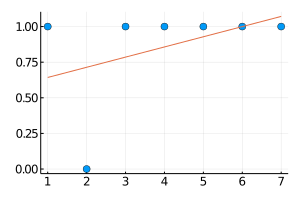

In [22]:
data = DataFrame(X=[1,2,3,4,5,6,7], Y=[1,0,1,1,1,1,1])
linear_reg = lm(@formula(Y ~ X), data)
scatter(data[!,:X],data[!,:Y],legend=false,size=(300,200))
plot!(1:7,predict(linear_reg))

In [23]:
cats = dataset("MASS", "cats")

,Sex,BWt,HWt
,Cat…,Float64,Float64
1,F,2.0,7.0
2,F,2.0,7.4
3,F,2.0,9.5
4,F,2.1,7.2
5,F,2.1,7.3
6,F,2.1,7.6
7,F,2.1,8.1
8,F,2.1,8.2
9,F,2.1,8.3


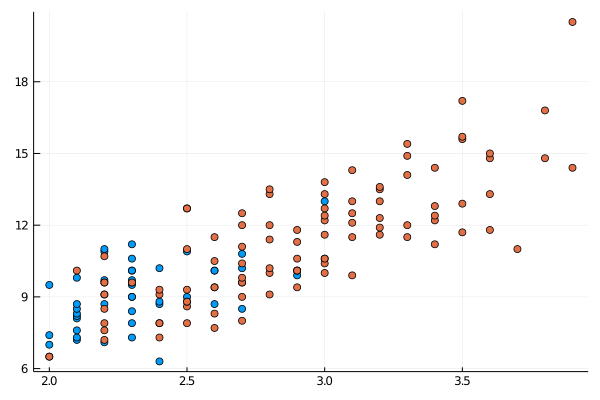

In [24]:
lmap = labelmap(cats[!,:Sex])
ci = labelencode(lmap, cats[!,:Sex])
scatter(cats[!,:BWt],cats[!,:HWt],color=ci,legend=false)

In [25]:
lmap

LabelMap (with 2 labels):
[1] F
[2] M


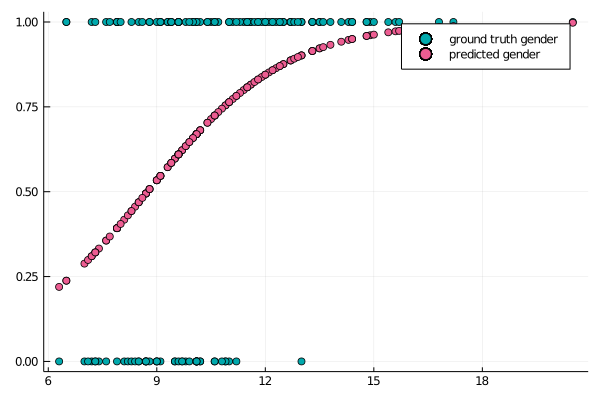

In [26]:
data = DataFrame(X=cats[!,:HWt], Y=ci.-1)
probit = glm(@formula(Y ~ X), data, Binomial(), LogitLink())
scatter(data[!,:X],data[!,:Y],label="ground truth gender",color=6)
scatter!(data[!,:X],predict(probit),label="predicted gender",color=7)

## Non linear regression

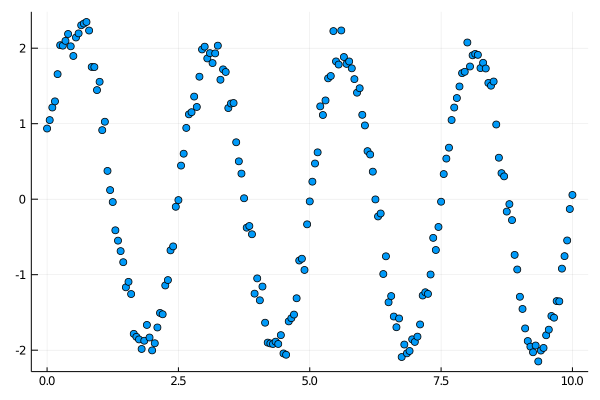

In [27]:
xvals = 0:0.05:10
yvals = 1*exp.(-xvals*2) + 2*sin.(0.8*pi*xvals) + 0.15 * randn(length(xvals));
scatter(xvals,yvals,legend=false)

In [28]:
@. model(x, p) = p[1]*exp(-x*p[2]) + p[3]*sin(0.8*pi*x)
p0 = [0.5, 0.5, 0.5]
myfit = curve_fit(model, xvals, yvals, p0)

LsqFit.LsqFitResult{Array{Float64,1},Array{Float64,1},Array{Float64,2},Array{Float64,1}}([0.9375948931578123, 1.9400256763715606, 1.9928187989119284], [0.0017587084392093333, 0.05293948967473194, 0.05364298756090213, 0.13872972407335316, -0.06015159467806419, -0.29128496657348935, -0.14567193700119807, -0.08608391852964514, -0.07396974590035743, 0.1699686039223538  …  -0.07488891266505338, -0.1356346845834555, 0.034124418879067475, -0.014362583057597966, 0.1817335032969183, -0.04023674610496264, 0.020832810906997734, 0.05110673044398528, -0.11961805196631109, -0.056125994045491186], [1.0000000000052196 0.0 0.0; 0.9075548409953624 -0.042545939210592056 0.12533323356261925; … ; 4.1366683855089755e-9 -3.859595074654585e-8 -0.1253332335649193; 3.7545135637451965e-9 -3.5203802345201996e-8 0.0], true, Float64[])

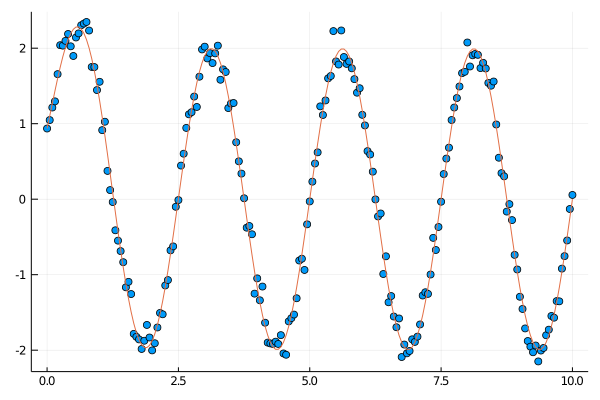

In [29]:
p = myfit.param
findyvals = p[1]*exp.(-xvals*p[2]) + p[3]*sin.(0.8*pi*xvals)
scatter(xvals,yvals,legend=false)
plot!(xvals,findyvals)

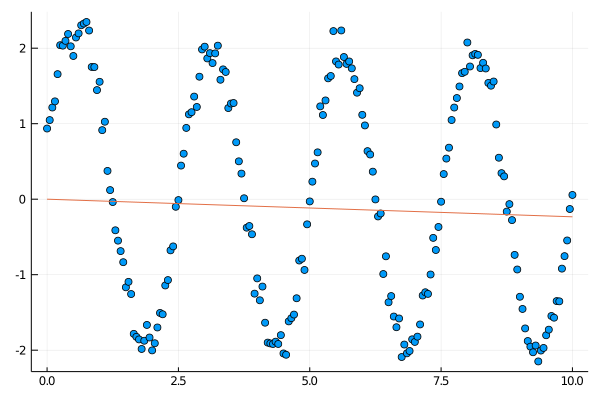

In [30]:
@. model(x, p) = p[1]*x
myfit = curve_fit(model, xvals, yvals, [0.5])
p = myfit.param
findyvals = p[1]*xvals
scatter(xvals,yvals,legend=false)
plot!(xvals,findyvals)